In [87]:
import torch
import torch.nn as nn
from torchvision import models,transforms
from PIL import Image
import os
import random
import matplotlib.pyplot as plt

### 1. Process the data

In [41]:
#define my dataset
data_image_path = "./data/graduate/images/"
data_label_path = "./data/graduate/labels/"

class MyDataset(torch.utils.data.Dataset):
    def __init__(self,image_path,label_path,is_transform=False):
        self.image_path = image_path
        self.label_path = label_path
        self.is_transform = is_transform
        self.image_names = sorted(os.listdir(image_path))
        self.label_names = sorted(os.listdir(label_path))
        self.transforms = transforms.Compose([transforms.Resize(224),
                                              transforms.ToTensor(),])
        if len(self.image_names)!=len(self.label_names):
            print("image and label dont match!")
    
    def __len__(self):
        return len(self.image_names)
    
    def __getitem__(self,idx):
        image = Image.open(os.path.join(self.image_path,self.image_names[idx]))
        label = Image.open(os.path.join(self.label_path,self.label_names[idx]))
        image_time = self.image_names[idx].split(".")[0]
        if self.is_transform==True:
            return (self.transforms(image),self.transforms(label),image_time)
        else:
            return (image,label,image_time)

In [42]:
mydataset=MyDataset(data_image_path,data_label_path,is_transform=True)

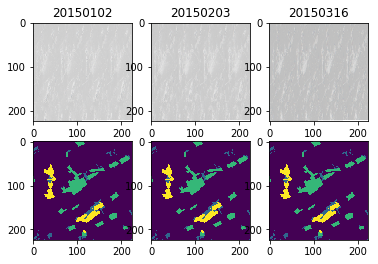

In [54]:
#visualize some image
plt.figure()
for i in range(1,4):
    ax = plt.subplot(230+i)
    ax.set_title(mydataset[i-1][2])
    plt.imshow(mydataset[i-1][0].permute(1,2,0))
for i in range(1,4):
    ax = plt.subplot(233+i)
    plt.imshow(mydataset[i-1][1][0,:,:])

### 2. extract some features

In [74]:
# use VGG16 as a fixed feature extractor
vggFeature = models.vgg16(pretrained=True).features
print(vggFeature)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(

In [75]:
# block4 maxpooling features
vggFeature2 = vggFeature[:24]
print(vggFeature2)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(

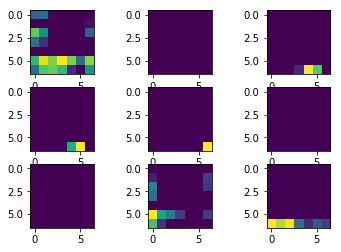

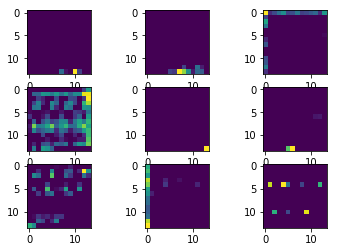

In [97]:
#visualize some feature map of vggFeature
input = mydataset[0][0][:3,:,:].unsqueeze(0)
out = vggFeature(input)
out2 = vggFeature2(input)
plt.figure()
for i in range(1,10):
    plt.subplot(330+i)
    randn = random.randint(0,out.size()[1]-1)
    fmap = out[0,randn,:,:]
    plt.imshow(fmap.detach().numpy())
    
plt.figure()
for i in range(1,10):
    plt.subplot(330+i)
    randn = random.randint(0,out2.size()[1]-1)
    fmap = out2[0,randn,:,:]
    plt.imshow(fmap.detach().numpy())